# Project Statement and Objective

In the financial industry, it is crucial for lenders to assess the credit worthiness of borrowers before granting loans or credit. Identifying potential defaulters, who are at higher risk of failing to repay their debts, can help mitigate financial losses and maintain a healthy lending portfolio. The goal of this project is to develop a predictive model that can accurately classify borrowers as defaulters or non-defaulters based on various financial and demographic factors.

To create a machine learning model to predict the defaulter and Non-defaulter by analyzing historical data

In [1]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn import metrics
from sklearn.cluster import KMeans

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


from sklearn.model_selection import train_test_split
from sklearn import metrics


from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# read csv file

df = pd.read_csv("loan.csv")

df.head(10)

,customer_id,loan_id,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,application_date,approval_date,disbursement_date,due_date,default_status
0,CUST-00004912,LN00004170,Car Loan,16795,0.051852,15,Self-employed,Medium,833,Male,Single,Master,05-04-2018,23-04-2018,24-04-2018,14-08-2018,False
1,CUST-00004194,LN00002413,Personal Loan,1860,0.089296,56,Full-time,Medium,776,Female,Married,Bachelor,30-12-2022,31-12-2022,12-01-2023,05-04-2023,False
2,CUST-00003610,LN00000024,Personal Loan,77820,0.070470,51,Full-time,Low,697,Male,Divorced,High School,15-11-2019,18-11-2019,27-11-2019,24-02-2020,False
3,CUST-00001895,LN00001742,Car Loan,55886,0.062155,30,Full-time,Low,795,Female,Married,PhD,25-08-2021,08-09-2021,11-09-2021,25-02-2022,False
4,CUST-00003782,LN00003161,Home Loan,7265,0.070635,48,Part-time,Low,519,Female,Married,High School,02-09-2020,07-09-2020,11-09-2020,29-12-2020,False
5,CUST-00002287,LN00003606,Car Loan,83386,0.077232,13,Self-employed,Medium,472,Male,Divorced,PhD,17-03-2021,17-03-2021,29-03-2021,25-06-2021,False
6,CUST-00004571,LN00003372,Car Loan,38194,0.070929,26,Part-time,High,689,Male,Married,PhD,04-09-2021,21-09-2021,04-10-2021,18-12-2021,False
7,CUST-00002572,LN00002092,Car Loan,88498,0.046917,13,Part-time,Low,801,Female,Divorced,High School,17-04-2021,24-04-2021,07-05-2021,24-10-2021,False
8,CUST-00001416,LN00001061,Home Loan,45131,0.093456,22,Self-employed,Low,559,Male,Divorced,Master,16-10-2019,28-10-2019,29-10-2019,28-02-2020,False
9,CUST-00000009,LN00003352,Education Loan,61263,0.099123,56,Self-employed,Low,430,Male,Divorced,PhD,07-08-2021,25-08-2021,01-09-2021,09-02-2022,False


In [4]:
# show columns in dataframe

df.columns

Index(['customer_id', 'loan_id', 'loan_type', 'loan_amount', 'interest_rate',
       'loan_term', 'employment_type', 'income_level', 'credit_score',
       'gender', 'marital_status', 'education_level', 'application_date',
       'approval_date', 'disbursement_date', 'due_date', 'default_status'],
      dtype='object')

In [5]:
# dimensions of the dataframe, (rows, columns)

df.shape

(5000, 17)

In [6]:
# remove unwanted columns
# needed columns added into new dataframe

drop_col = ['customer_id', 'loan_id', 'application_date', 'approval_date', 'disbursement_date', 'due_date']

df1 = df.drop(drop_col, axis = 1)

df1.head()

,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,default_status
0,Car Loan,16795,0.051852,15,Self-employed,Medium,833,Male,Single,Master,False
1,Personal Loan,1860,0.089296,56,Full-time,Medium,776,Female,Married,Bachelor,False
2,Personal Loan,77820,0.070470,51,Full-time,Low,697,Male,Divorced,High School,False
3,Car Loan,55886,0.062155,30,Full-time,Low,795,Female,Married,PhD,False
4,Home Loan,7265,0.070635,48,Part-time,Low,519,Female,Married,High School,False


In [7]:
# show columns in new dataframe

df1.shape

(5000, 11)

In [8]:
# dimensions of the new dataframe, (rows, columns)

df1.columns

Index(['loan_type', 'loan_amount', 'interest_rate', 'loan_term',
       'employment_type', 'income_level', 'credit_score', 'gender',
       'marital_status', 'education_level', 'default_status'],
      dtype='object')

In [9]:
# information about the categories, rows, missing values and data type

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   loan_type        5000 non-null   object 
 1   loan_amount      5000 non-null   int64  
 2   interest_rate    5000 non-null   float64
 3   loan_term        5000 non-null   int64  
 4   employment_type  5000 non-null   object 
 5   income_level     5000 non-null   object 
 6   credit_score     5000 non-null   int64  
 7   gender           5000 non-null   object 
 8   marital_status   5000 non-null   object 
 9   education_level  5000 non-null   object 
 10  default_status   5000 non-null   bool   
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 395.6+ KB


In [10]:
# statistics for numerical columns/variables

df1.describe()

,loan_amount,interest_rate,loan_term,credit_score
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,49929.868000,0.079579,35.263000,573.206000
std,28721.249529,0.015230,13.792501,158.647522
min,1055.000000,0.031685,12.000000,300.000000
25%,24953.500000,0.069240,24.000000,435.000000
50%,49730.000000,0.079533,35.000000,571.000000
75%,75083.500000,0.089984,47.000000,712.000000
max,99989.000000,0.138894,59.000000,849.000000


In [11]:
# checking total empty values in each column/variable

df1.isnull().sum()

loan_type          0
loan_amount        0
interest_rate      0
loan_term          0
employment_type    0
income_level       0
credit_score       0
gender             0
marital_status     0
education_level    0
default_status     0
dtype: int64

In [12]:
# correlation between numerical variables

df1.corr()

,loan_amount,interest_rate,loan_term,credit_score,default_status
loan_amount,1.000000,-0.017317,0.004763,-0.004780,-0.007309
interest_rate,-0.017317,1.000000,-0.014311,0.016064,0.028963
loan_term,0.004763,-0.014311,1.000000,-0.023735,-0.012358
credit_score,-0.004780,0.016064,-0.023735,1.000000,-0.007346
default_status,-0.007309,0.028963,-0.012358,-0.007346,1.000000


# Categorical Variables

In [13]:
# total number of times for each category under the categorical variable 

df1['loan_type'].value_counts()

Personal Loan     1281
Car Loan          1273
Home Loan         1264
Education Loan    1182
Name: loan_type, dtype: int64

In [14]:
# total number of times for each category under the categorical variable 

df1['employment_type'].value_counts()

Part-time        1672
Self-employed    1669
Full-time        1659
Name: employment_type, dtype: int64

In [15]:
# total number of times for each category under the categorical variable 

df1['income_level'].value_counts()

Low       1713
Medium    1672
High      1615
Name: income_level, dtype: int64

In [16]:
# total number of times for each category under the categorical variable 

df1['gender'].value_counts()

Male      2542
Female    2458
Name: gender, dtype: int64

In [17]:
# total number of times for each category under the categorical variable 

df1['marital_status'].value_counts()

Divorced    1682
Married     1681
Single      1637
Name: marital_status, dtype: int64

In [18]:
# total number of times for each category under the categorical variable 

df1['education_level'].value_counts()

PhD            1282
Master         1254
Bachelor       1254
High School    1210
Name: education_level, dtype: int64

In [19]:
# total number of times for each category under the categorical variable 

df1['default_status'].value_counts()

False    4001
True      999
Name: default_status, dtype: int64

# Numerical Variables

In [20]:
# skewness for numerical variable
# close to 0, variable is about symmetric

skew_loan_amnt = df1.loan_amount.skew(axis = 0, skipna = True)
print('Loan Amount skewness: ', skew_loan_amnt)

Loan Amount skewness:  0.022557766982177468


In [21]:
# skewness for numerical variable
# close to 0, variable is about symmetric

skew_interest_rate = df1.interest_rate.skew(axis = 0, skipna = True)
print('Interest Rate skewness: ', skew_interest_rate)

Interest Rate skewness:  0.010144996396479804


In [22]:
# skewness for numerical variable
# close to 0, variable is about symmetric

skew_loan_term = df1.loan_term.skew(axis = 0, skipna = True)
print('Loan Term skewness: ', skew_loan_term)

Loan Term skewness:  0.031273752868043604


In [23]:
# skewness for numerical variable
# close to 0, variable is about symmetric

skew_credit_score = df1.credit_score.skew(axis = 0, skipna = True)
print('Credit Score skewness: ', skew_credit_score)

Credit Score skewness:  0.010039817997711456


<Axes: xlabel='loan_amount', ylabel='Density'>

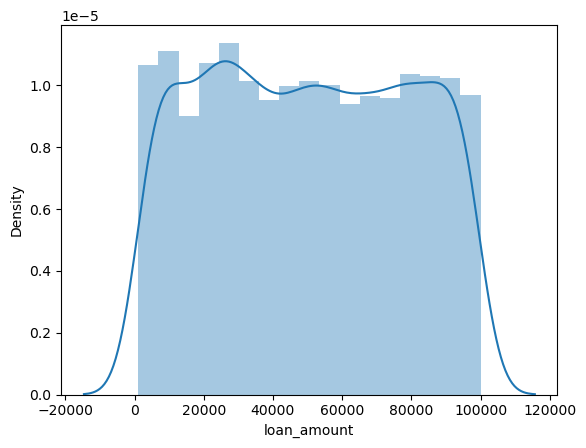

In [24]:
# distribution plot for numerical variable
# variable is about symmetric

sns.distplot(df1['loan_amount'])

<Axes: xlabel='interest_rate', ylabel='Density'>

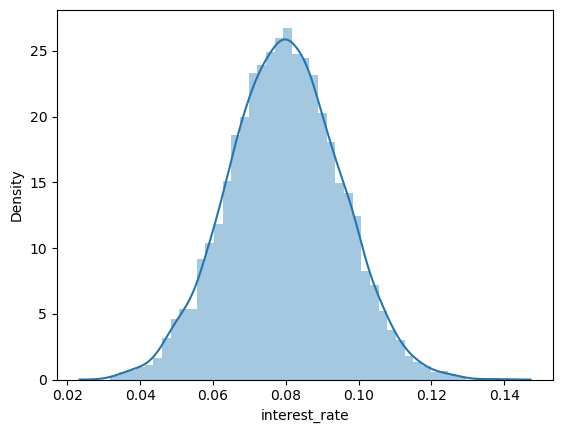

In [25]:
# distribution plot for numerical variable
# variable is symmetric

sns.distplot(df1['interest_rate'])

<Axes: xlabel='loan_term', ylabel='Density'>

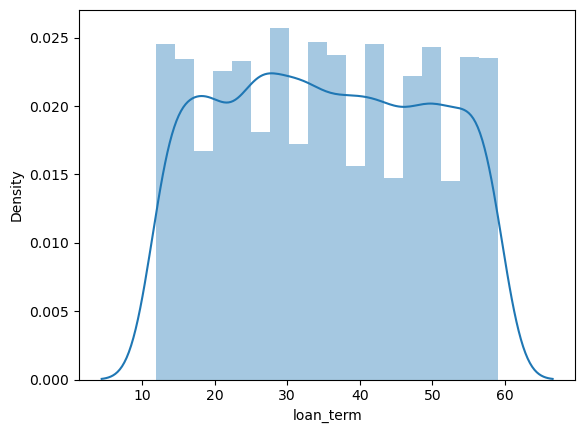

In [26]:
# distribution plot for numerical variable
# variable is about symmetric

sns.distplot(df1['loan_term'])

<Axes: xlabel='credit_score', ylabel='Density'>

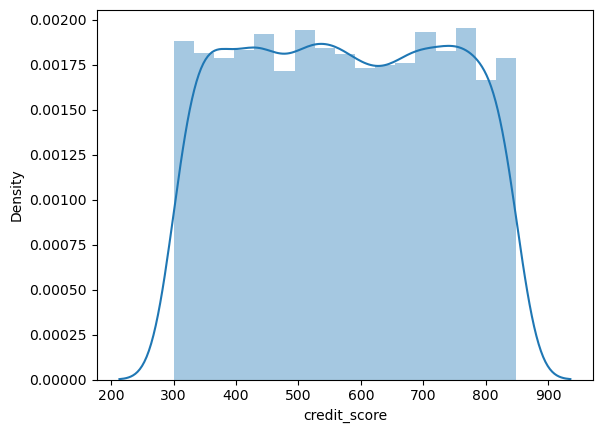

In [27]:
# distribution plot for numerical variable
# variable is about symmetric

sns.distplot(df1['credit_score'])

# Exploratory Data Analysis (EDA)

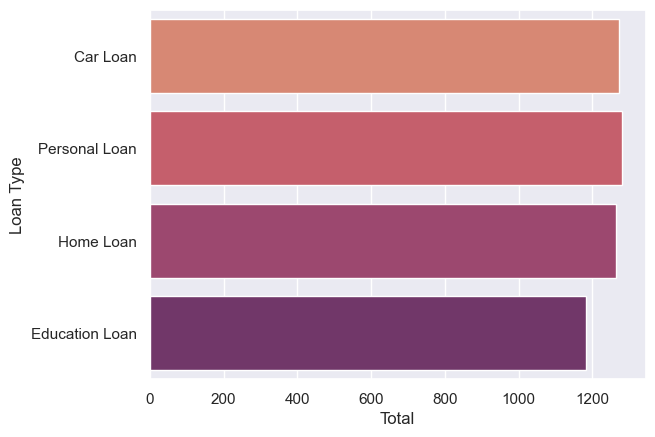

In [28]:
# bar graph for categories of categorical variable
# shows the total number for each category under the categorical variable

sns.set_theme(style="darkgrid")
sns.countplot(y="loan_type", data=df1, palette="flare")
plt.ylabel('Loan Type')
plt.xlabel('Total')
plt.show()

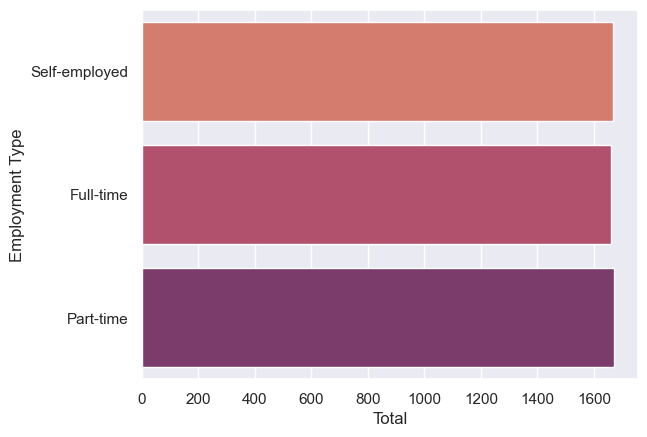

In [29]:
# bar graph for categories of categorical variable
# shows the total number for each category under the categorical variable

sns.set_theme(style="darkgrid")
sns.countplot(y="employment_type", data=df1, palette="flare")
plt.ylabel('Employment Type')
plt.xlabel('Total')
plt.show()

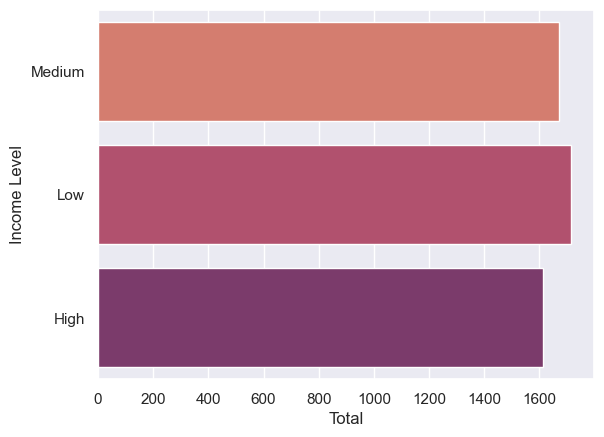

In [30]:
# bar graph for categories of categorical variable
# shows the total number for each category under the categorical variable

sns.set_theme(style="darkgrid")
sns.countplot(y="income_level", data=df1, palette="flare")
plt.ylabel('Income Level')
plt.xlabel('Total')
plt.show()

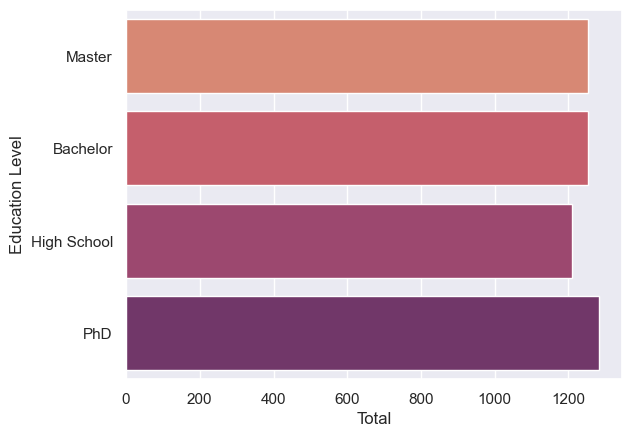

In [31]:
# bar graph for categories of categorical variable
# shows the total number for each category under the categorical variable

sns.set_theme(style="darkgrid")
sns.countplot(y="education_level", data=df1, palette="flare")
plt.ylabel('Education Level')
plt.xlabel('Total')
plt.show()

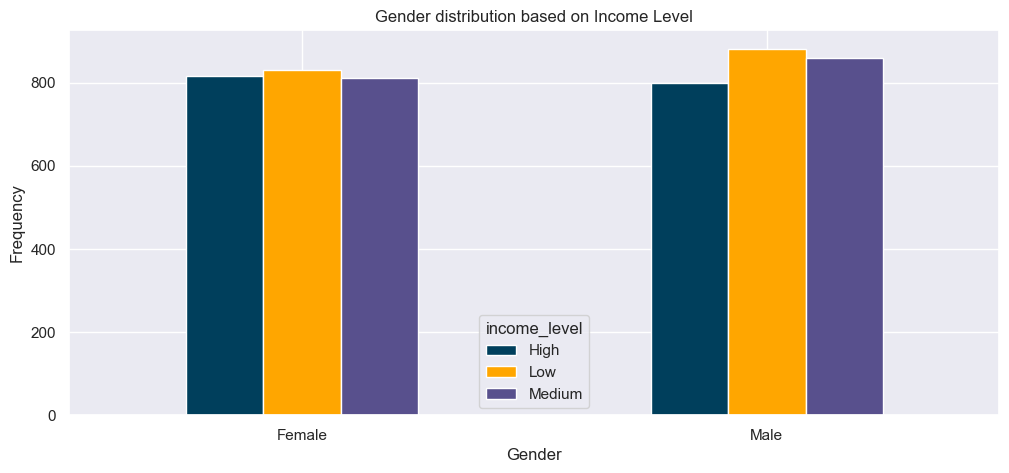

In [32]:
# column graph for gender based on income level

pd.crosstab(df1.gender,df1.income_level).plot(kind="bar",figsize=(12,5),color=['#003f5c','#ffa600','#58508d'])
plt.title('Gender distribution based on Income Level')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

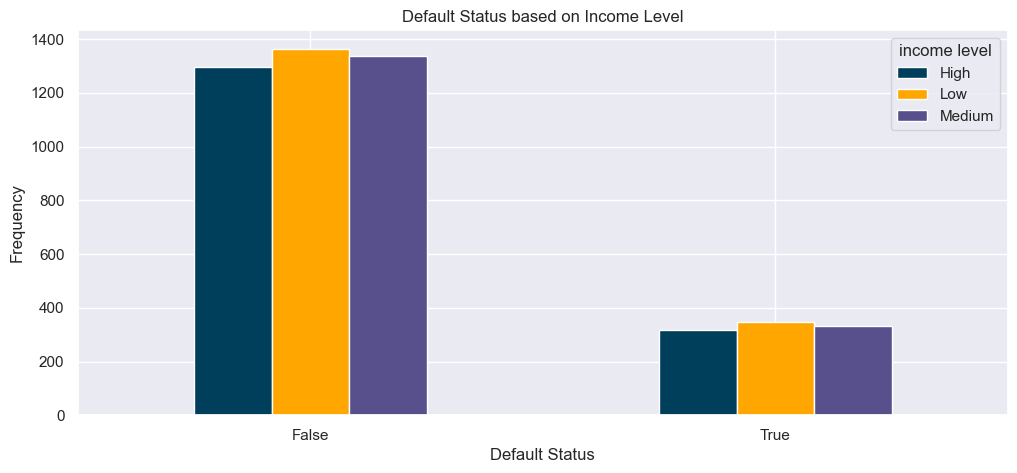

In [33]:
# column graph for default status(target variable) based on income level

pd.crosstab(df1.default_status,df1.income_level).plot(kind="bar",figsize=(12,5),color=['#003f5c','#ffa600','#58508d'])
plt.title('Default Status based on Income Level')
plt.xlabel('Default Status')
plt.legend(title= 'income level')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

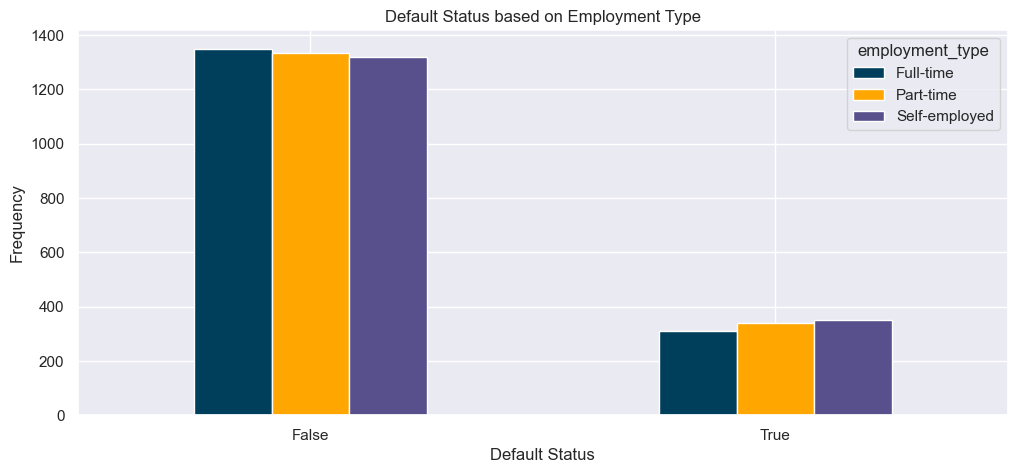

In [34]:
# column graph for default status based on employment type

pd.crosstab(df1.default_status,df1.employment_type).plot(kind="bar",figsize=(12,5),color=['#003f5c','#ffa600','#58508d'])
plt.title('Default Status based on Employment Type')
plt.xlabel('Default Status')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

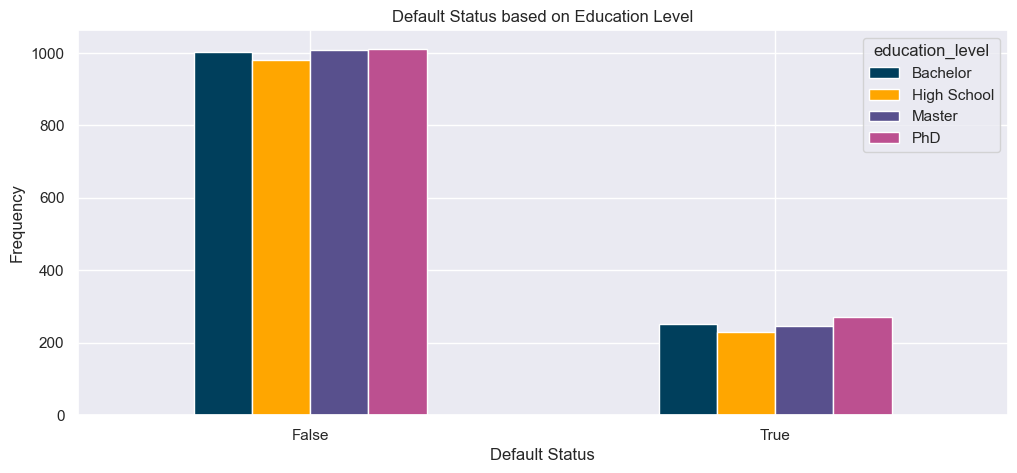

In [35]:
# column graph for default status based on education type

pd.crosstab(df1.default_status,df1.education_level).plot(kind="bar",figsize=(12,5), color=['#003f5c','#ffa600','#58508d','#bc5090'])
plt.title('Default Status based on Education Level')
plt.xlabel('Default Status')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

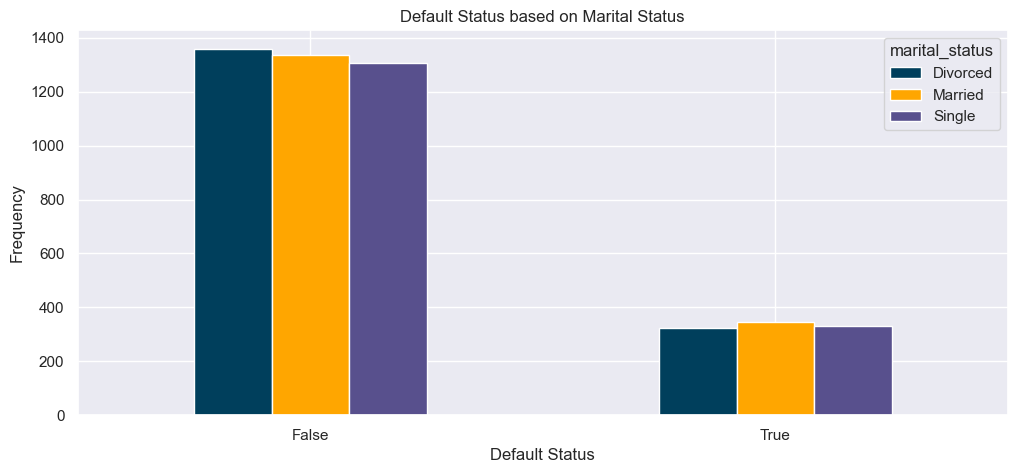

In [36]:
# column graph for default status based on marital status

pd.crosstab(df1.default_status,df1.marital_status).plot(kind="bar",figsize=(12,5), color=['#003f5c','#ffa600','#58508d'])
plt.title('Default Status based on Marital Status')
plt.xlabel('Default Status')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

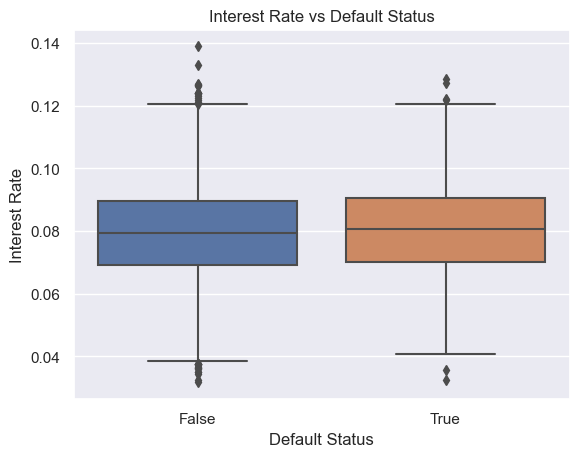

In [37]:
# boxplot for interest rate vs default status

sns.boxplot(x = 'default_status', y = 'interest_rate', data = df1)
plt.xlabel('Default Status')
plt.ylabel('Interest Rate')
plt.title('Interest Rate vs Default Status')
plt.show()

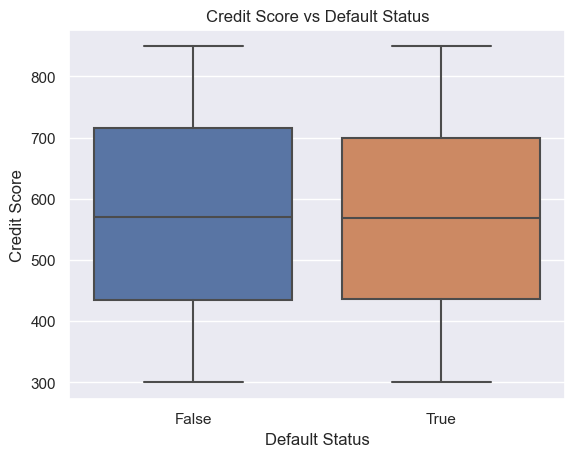

In [38]:
# boxplot for credit score vs default status

sns.boxplot(x = 'default_status', y = 'credit_score', data = df1)
plt.xlabel('Default Status')
plt.ylabel('Credit Score')
plt.title('Credit Score vs Default Status')
plt.show()

# Data Preparation

In [39]:
# view first few rows

df1.head()

,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,default_status
0,Car Loan,16795,0.051852,15,Self-employed,Medium,833,Male,Single,Master,False
1,Personal Loan,1860,0.089296,56,Full-time,Medium,776,Female,Married,Bachelor,False
2,Personal Loan,77820,0.070470,51,Full-time,Low,697,Male,Divorced,High School,False
3,Car Loan,55886,0.062155,30,Full-time,Low,795,Female,Married,PhD,False
4,Home Loan,7265,0.070635,48,Part-time,Low,519,Female,Married,High School,False


In [40]:
# Converting text to integer
# loan_type column: 
# Car Loan - 1
# Personal Loan - 2
# Home Loan - 3
# Education Loan - 4

df1['loan_type'] = df1['loan_type'].map({ "Car Loan": 1, "Personal Loan": 2, 
                                       "Home Loan": 3, "Education Loan": 4})

df1.head()

,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,default_status
0,1,16795,0.051852,15,Self-employed,Medium,833,Male,Single,Master,False
1,2,1860,0.089296,56,Full-time,Medium,776,Female,Married,Bachelor,False
2,2,77820,0.070470,51,Full-time,Low,697,Male,Divorced,High School,False
3,1,55886,0.062155,30,Full-time,Low,795,Female,Married,PhD,False
4,3,7265,0.070635,48,Part-time,Low,519,Female,Married,High School,False


In [41]:
# Converting text to integer
# marital_status column: 
# Single - 1
# Married - 2
# Divorced - 3

df1['marital_status'] = df1['marital_status'].map({ "Single": 1, "Married": 2, "Divorced": 3})

df1.head()

,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,default_status
0,1,16795,0.051852,15,Self-employed,Medium,833,Male,1,Master,False
1,2,1860,0.089296,56,Full-time,Medium,776,Female,2,Bachelor,False
2,2,77820,0.070470,51,Full-time,Low,697,Male,3,High School,False
3,1,55886,0.062155,30,Full-time,Low,795,Female,2,PhD,False
4,3,7265,0.070635,48,Part-time,Low,519,Female,2,High School,False


In [42]:
# Converting text to integer
# gender column: 
# Male - 1
# Female - 2

df1['gender'] = df1['gender'].map({'Male': 1, 'Female': 2})

df1.head()

,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,default_status
0,1,16795,0.051852,15,Self-employed,Medium,833,1,1,Master,False
1,2,1860,0.089296,56,Full-time,Medium,776,2,2,Bachelor,False
2,2,77820,0.070470,51,Full-time,Low,697,1,3,High School,False
3,1,55886,0.062155,30,Full-time,Low,795,2,2,PhD,False
4,3,7265,0.070635,48,Part-time,Low,519,2,2,High School,False


In [43]:
# Converting text to integer
# education_level column: 
# High School - 1
# Bachelor - 2
# Master - 3
# PhD - 4

df1['education_level'] = df1['education_level'].map({ "PhD": 4, "Master": 3, 
                                                     "Bachelor": 2, "High School": 1})

df1.head()

,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,default_status
0,1,16795,0.051852,15,Self-employed,Medium,833,1,1,3,False
1,2,1860,0.089296,56,Full-time,Medium,776,2,2,2,False
2,2,77820,0.070470,51,Full-time,Low,697,1,3,1,False
3,1,55886,0.062155,30,Full-time,Low,795,2,2,4,False
4,3,7265,0.070635,48,Part-time,Low,519,2,2,1,False


In [44]:
# Converting text to integer
# employment_type column: 
# Self-employed - 1
# Part-time - 2
# Full-time - 3

df1['employment_type'] = df1['employment_type'].map({ "Full-time": 3, "Part-time": 2, 
                                                   "Self-employed": 1})

df1.head()

,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,default_status
0,1,16795,0.051852,15,1,Medium,833,1,1,3,False
1,2,1860,0.089296,56,3,Medium,776,2,2,2,False
2,2,77820,0.070470,51,3,Low,697,1,3,1,False
3,1,55886,0.062155,30,3,Low,795,2,2,4,False
4,3,7265,0.070635,48,2,Low,519,2,2,1,False


In [45]:
# Converting text to integer
# income_level column: 
# Low - 1
# Medium - 2
# High - 3

df1["income_level"] = df1["income_level"].map({ "Low": 1, "Medium": 2, "High": 3})

df1.head()

,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,default_status
0,1,16795,0.051852,15,1,2,833,1,1,3,False
1,2,1860,0.089296,56,3,2,776,2,2,2,False
2,2,77820,0.070470,51,3,1,697,1,3,1,False
3,1,55886,0.062155,30,3,1,795,2,2,4,False
4,3,7265,0.070635,48,2,1,519,2,2,1,False


In [46]:
# Converting true/false (boolean) text to integer
# default_status column: 
# False - 0
# True - 1

df1["default_status"] = df1["default_status"].astype(int)

df1.head()

,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,default_status
0,1,16795,0.051852,15,1,2,833,1,1,3,0
1,2,1860,0.089296,56,3,2,776,2,2,2,0
2,2,77820,0.070470,51,3,1,697,1,3,1,0
3,1,55886,0.062155,30,3,1,795,2,2,4,0
4,3,7265,0.070635,48,2,1,519,2,2,1,0


# Modelling

In [47]:
# Import libraries

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [48]:
# separate into train and test fror non-target variables
# and target variables
# 70 % train 30% test

X = df1.drop(["default_status"], axis=1)
y = df1["default_status"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90      1215
           1       0.00      0.00      0.00       285

    accuracy                           0.81      1500
   macro avg       0.41      0.50      0.45      1500
weighted avg       0.66      0.81      0.72      1500

[[1215    0]
 [ 285    0]]
Logistic Regression accuracy is: 81.00%


In [50]:
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(solver='newton-cg', max_iter=5000)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90      1215
           1       0.00      0.00      0.00       285

    accuracy                           0.81      1500
   macro avg       0.41      0.50      0.45      1500
weighted avg       0.66      0.81      0.72      1500

[[1215    0]
 [ 285    0]]
Logistic Regression accuracy is: 81.00%


In [51]:
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(solver='sag', max_iter=5000)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90      1215
           1       0.00      0.00      0.00       285

    accuracy                           0.81      1500
   macro avg       0.41      0.50      0.45      1500
weighted avg       0.66      0.81      0.72      1500

[[1215    0]
 [ 285    0]]
Logistic Regression accuracy is: 81.00%


In [52]:
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(solver='saga', max_iter=5000)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90      1215
           1       0.00      0.00      0.00       285

    accuracy                           0.81      1500
   macro avg       0.41      0.50      0.45      1500
weighted avg       0.66      0.81      0.72      1500

[[1215    0]
 [ 285    0]]
Logistic Regression accuracy is: 81.00%


In [53]:
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(solver='lbfgs', max_iter=5000)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90      1215
           1       0.00      0.00      0.00       285

    accuracy                           0.81      1500
   macro avg       0.41      0.50      0.45      1500
weighted avg       0.66      0.81      0.72      1500

[[1215    0]
 [ 285    0]]
Logistic Regression accuracy is: 81.00%


# Support Vector Machines

In [54]:
from sklearn.svm import SVC
SVCclassifier = SVC(kernel='linear', max_iter=251)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy is: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.80      0.39      0.53      1215
           1       0.18      0.57      0.27       285

    accuracy                           0.43      1500
   macro avg       0.49      0.48      0.40      1500
weighted avg       0.68      0.43      0.48      1500

[[479 736]
 [123 162]]
SVC accuracy is: 42.73%


In [55]:
from sklearn.svm import SVC
SVCclassifier = SVC(kernel='poly', max_iter=5000)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy is: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90      1215
           1       0.00      0.00      0.00       285

    accuracy                           0.81      1500
   macro avg       0.41      0.50      0.45      1500
weighted avg       0.66      0.81      0.72      1500

[[1215    0]
 [ 285    0]]
SVC accuracy is: 81.00%


In [56]:
from sklearn.svm import SVC
SVCclassifier = SVC(kernel='poly')
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy is: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90      1215
           1       0.00      0.00      0.00       285

    accuracy                           0.81      1500
   macro avg       0.41      0.50      0.45      1500
weighted avg       0.66      0.81      0.72      1500

[[1215    0]
 [ 285    0]]
SVC accuracy is: 81.00%


# K Neighbors

In [57]:
from sklearn.neighbors import KNeighborsClassifier
KNclassifier = KNeighborsClassifier(n_neighbors=30)
KNclassifier.fit(X_train, y_train)

y_pred = KNclassifier.predict(X_test.values)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
KNAcc = accuracy_score(y_pred,y_test)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90      1215
           1       0.00      0.00      0.00       285

    accuracy                           0.81      1500
   macro avg       0.41      0.50      0.45      1500
weighted avg       0.66      0.81      0.72      1500

[[1215    0]
 [ 285    0]]
K Neighbours accuracy is: 81.00%


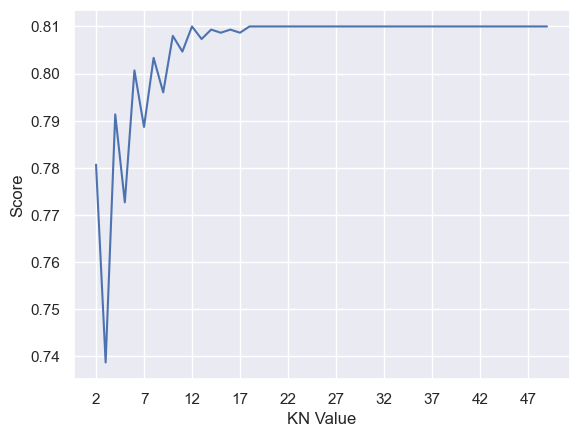

KNeighbours Acc Max 81.00%


In [58]:
scoreListKN = []
for i in range(2,50):
    KNclassifier = KNeighborsClassifier(n_neighbors=i)
    KNclassifier.fit(X_train, y_train)
    scoreListKN.append(KNclassifier.score(X_test.values, y_test))
    
plt.plot(range(2,50), scoreListKN)
plt.xticks(np.arange(2,50,5))
plt.xlabel("KN Value")
plt.ylabel("Score")
plt.show()
KNAccMax = max(scoreListKN)
print("KNeighbours Acc Max {:.2f}%".format(KNAccMax*100))

# Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=2)
DTclassifier.fit(X_train, y_train)

y_pred = DTclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
DTAcc = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90      1215
           1       0.00      0.00      0.00       285

    accuracy                           0.81      1500
   macro avg       0.41      0.50      0.45      1500
weighted avg       0.66      0.81      0.72      1500

[[1215    0]
 [ 285    0]]
Decision Tree accuracy is: 81.00%


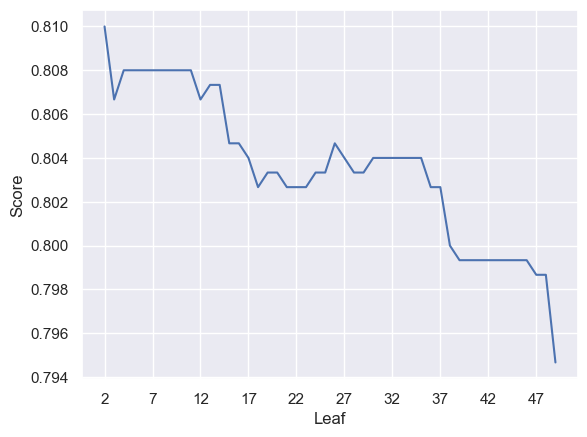

DT Acc Max 81.00%


In [60]:
scoreListDT = []
for i in range(2,50):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,50), scoreListDT)
plt.xticks(np.arange(2,50,5))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAccMax = max(scoreListDT)
print("DT Acc Max {:.2f}%".format(DTAccMax*100))

# Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier(max_leaf_nodes=30)
RFclassifier.fit(X_train, y_train)

y_pred = RFclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90      1215
           1       0.00      0.00      0.00       285

    accuracy                           0.81      1500
   macro avg       0.41      0.50      0.45      1500
weighted avg       0.66      0.81      0.72      1500

[[1215    0]
 [ 285    0]]
Random Forest accuracy is: 81.00%


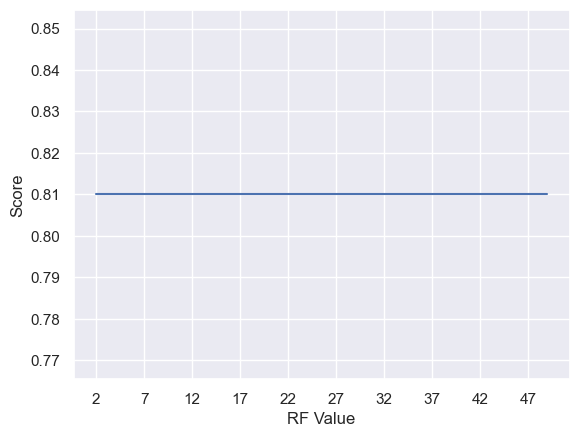

RF Acc Max 81.00%


In [62]:
# estimators is the number of tress it will create

scoreListRF = []
for i in range(2,50):
    RFclassifier = RandomForestClassifier(n_estimators = 200, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    
plt.plot(range(2,50), scoreListRF)
plt.xticks(np.arange(2,50,5))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAccMax = max(scoreListRF)
print("RF Acc Max {:.2f}%".format(RFAccMax*100))

# Categorical Naive Bayes

In [63]:
# Naive Bayes from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import CategoricalNB

NBclassifier1 = CategoricalNB()
NBclassifier1.fit(X_train, y_train)

y_pred = NBclassifier1.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc1 = accuracy_score(y_pred,y_test)
print('Naive Bayes accuracy is: {:.2f}%'.format(NBAcc1*100))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1215
           1       0.20      0.02      0.03       285

    accuracy                           0.80      1500
   macro avg       0.51      0.50      0.46      1500
weighted avg       0.69      0.80      0.73      1500

[[1195   20]
 [ 280    5]]
Naive Bayes accuracy is: 80.00%


# Gaussian Naive Bayes

In [64]:
# GaussianNB
from sklearn.naive_bayes import GaussianNB
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy is: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90      1215
           1       0.00      0.00      0.00       285

    accuracy                           0.81      1500
   macro avg       0.41      0.50      0.45      1500
weighted avg       0.66      0.81      0.72      1500

[[1215    0]
 [ 285    0]]
Gaussian Naive Bayes accuracy is: 81.00%


In [65]:
# accuracy of all models into a dataframe

compare = pd.DataFrame({'Model': ['Logistic Regression', 'SVM', 'Decision Tree',  'Random Forest', 'GaussianNB', 'CategoricalNB'], 
                        'Accuracy': [LRAcc*100, SVCAcc*100, DTAcc*100, RFAcc*100, NBAcc2*100, NBAcc1*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,Logistic Regression,81.0
1,SVM,81.0
2,Decision Tree,81.0
3,Random Forest,81.0
4,GaussianNB,81.0
5,CategoricalNB,80.0


<Axes: >

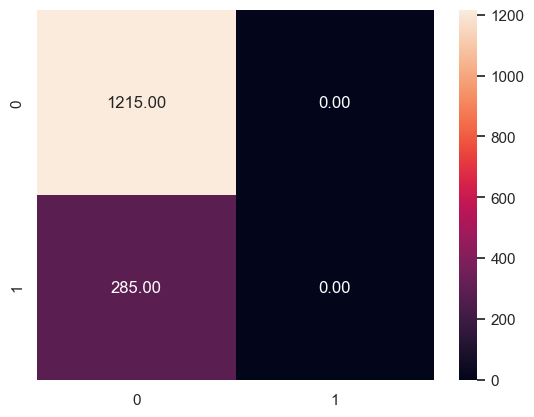

In [66]:
# true negative 0-0
# actuals are y-test
# heatmap

import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = '.2f')

From the results, it can be seen that most of ML models can reach up to 80% accuracy 
in predicting classification of loan default status

In [67]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [68]:
y_test

398     0
3833    0
4836    0
4572    0
636     0
       ..
4554    0
4807    1
1073    0
2906    0
1357    0
Name: default_status, Length: 1500, dtype: int32

In [69]:
# separate into train and test fror non-target variables
# and target variables
# 75 % train 25% test

X = df1.drop(["default_status"], axis=1)
y = df1["default_status"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1009
           1       0.00      0.00      0.00       241

    accuracy                           0.81      1250
   macro avg       0.40      0.50      0.45      1250
weighted avg       0.65      0.81      0.72      1250

[[1009    0]
 [ 241    0]]
Logistic Regression accuracy is: 80.72%


In [71]:
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(solver='newton-cg', max_iter=5000)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1009
           1       0.00      0.00      0.00       241

    accuracy                           0.81      1250
   macro avg       0.40      0.50      0.45      1250
weighted avg       0.65      0.81      0.72      1250

[[1009    0]
 [ 241    0]]
Logistic Regression accuracy is: 80.72%


In [72]:
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(solver='sag', max_iter=5000)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1009
           1       0.00      0.00      0.00       241

    accuracy                           0.81      1250
   macro avg       0.40      0.50      0.45      1250
weighted avg       0.65      0.81      0.72      1250

[[1009    0]
 [ 241    0]]
Logistic Regression accuracy is: 80.72%


In [73]:
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(solver='saga', max_iter=5000)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1009
           1       0.00      0.00      0.00       241

    accuracy                           0.81      1250
   macro avg       0.40      0.50      0.45      1250
weighted avg       0.65      0.81      0.72      1250

[[1009    0]
 [ 241    0]]
Logistic Regression accuracy is: 80.72%


In [74]:
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(solver='lbfgs', max_iter=5000)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1009
           1       0.00      0.00      0.00       241

    accuracy                           0.81      1250
   macro avg       0.40      0.50      0.45      1250
weighted avg       0.65      0.81      0.72      1250

[[1009    0]
 [ 241    0]]
Logistic Regression accuracy is: 80.72%


# Support Vector Machines

In [75]:
from sklearn.svm import SVC
SVCclassifier = SVC(kernel='linear', max_iter=251)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy is: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.79      0.41      0.54      1009
           1       0.18      0.55      0.27       241

    accuracy                           0.43      1250
   macro avg       0.49      0.48      0.41      1250
weighted avg       0.67      0.43      0.49      1250

[[410 599]
 [108 133]]
SVC accuracy is: 43.44%


In [76]:
from sklearn.svm import SVC
SVCclassifier = SVC(kernel='poly', max_iter=5000)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy is: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1009
           1       0.00      0.00      0.00       241

    accuracy                           0.81      1250
   macro avg       0.40      0.50      0.45      1250
weighted avg       0.65      0.81      0.72      1250

[[1009    0]
 [ 241    0]]
SVC accuracy is: 80.72%


In [77]:
from sklearn.svm import SVC
SVCclassifier = SVC(kernel='poly')
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy is: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1009
           1       0.00      0.00      0.00       241

    accuracy                           0.81      1250
   macro avg       0.40      0.50      0.45      1250
weighted avg       0.65      0.81      0.72      1250

[[1009    0]
 [ 241    0]]
SVC accuracy is: 80.72%


# K Neighbors

In [78]:
from sklearn.neighbors import KNeighborsClassifier
KNclassifier = KNeighborsClassifier(n_neighbors=30)
KNclassifier.fit(X_train, y_train)

y_pred = KNclassifier.predict(X_test.values)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
KNAcc = accuracy_score(y_pred,y_test)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1009
           1       0.00      0.00      0.00       241

    accuracy                           0.81      1250
   macro avg       0.40      0.50      0.45      1250
weighted avg       0.65      0.81      0.72      1250

[[1009    0]
 [ 241    0]]
K Neighbours accuracy is: 80.72%


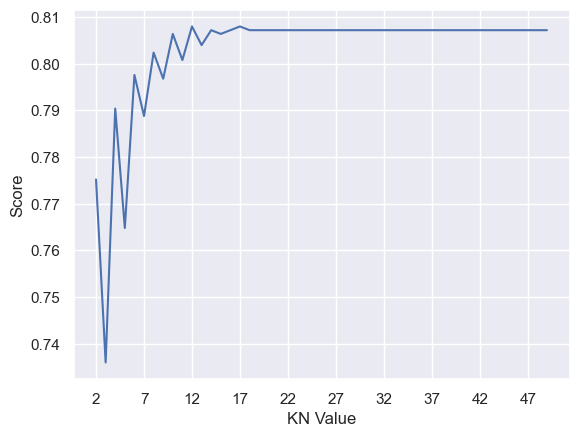

KNeighbours Acc Max 80.80%


In [79]:
scoreListKN = []
for i in range(2,50):
    KNclassifier = KNeighborsClassifier(n_neighbors=i)
    KNclassifier.fit(X_train, y_train)
    scoreListKN.append(KNclassifier.score(X_test.values, y_test))
    
plt.plot(range(2,50), scoreListKN)
plt.xticks(np.arange(2,50,5))
plt.xlabel("KN Value")
plt.ylabel("Score")
plt.show()
KNAccMax = max(scoreListKN)
print("KNeighbours Acc Max {:.2f}%".format(KNAccMax*100))

# Decision Tree

In [80]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=2)
DTclassifier.fit(X_train, y_train)

y_pred = DTclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
DTAcc = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1009
           1       0.00      0.00      0.00       241

    accuracy                           0.81      1250
   macro avg       0.40      0.50      0.45      1250
weighted avg       0.65      0.81      0.72      1250

[[1009    0]
 [ 241    0]]
Decision Tree accuracy is: 80.72%


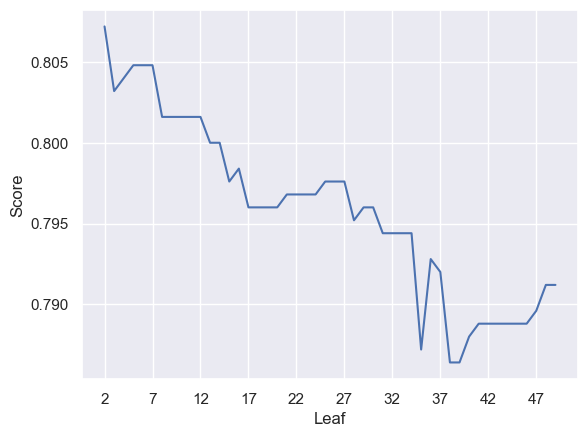

DT Acc Max 80.72%


In [81]:
scoreListDT = []
for i in range(2,50):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,50), scoreListDT)
plt.xticks(np.arange(2,50,5))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAccMax = max(scoreListDT)
print("DT Acc Max {:.2f}%".format(DTAccMax*100))

# Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier(max_leaf_nodes=30)
RFclassifier.fit(X_train, y_train)

y_pred = RFclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1009
           1       0.00      0.00      0.00       241

    accuracy                           0.81      1250
   macro avg       0.40      0.50      0.45      1250
weighted avg       0.65      0.81      0.72      1250

[[1009    0]
 [ 241    0]]
Random Forest accuracy is: 80.72%


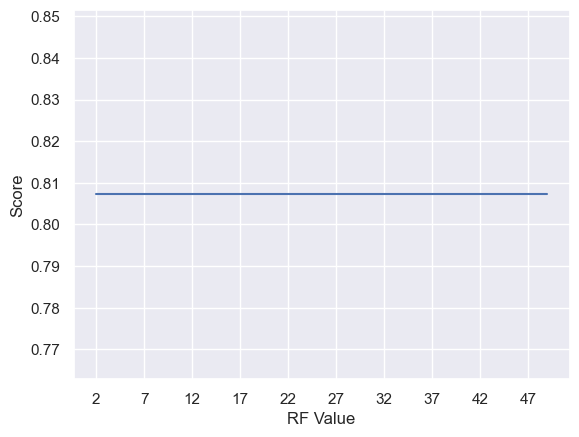

RF Acc Max 80.72%


In [83]:
# estimators is the number of tress it will create

scoreListRF = []
for i in range(2,50):
    RFclassifier = RandomForestClassifier(n_estimators = 200, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    
plt.plot(range(2,50), scoreListRF)
plt.xticks(np.arange(2,50,5))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAccMax = max(scoreListRF)
print("RF Acc Max {:.2f}%".format(RFAccMax*100))

# Categorical Naive Bayes

In [84]:
# Naive Bayes from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import CategoricalNB

NBclassifier1 = CategoricalNB()
NBclassifier1.fit(X_train, y_train)

y_pred = NBclassifier1.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc1 = accuracy_score(y_pred,y_test)
print('Naive Bayes accuracy is: {:.2f}%'.format(NBAcc1*100))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1009
           1       0.15      0.01      0.02       241

    accuracy                           0.80      1250
   macro avg       0.48      0.50      0.45      1250
weighted avg       0.68      0.80      0.72      1250

[[992  17]
 [238   3]]
Naive Bayes accuracy is: 79.60%


# Gaussian Naive Bayes

In [85]:
# GaussianNB
from sklearn.naive_bayes import GaussianNB
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy is: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1009
           1       0.00      0.00      0.00       241

    accuracy                           0.81      1250
   macro avg       0.40      0.50      0.45      1250
weighted avg       0.65      0.81      0.72      1250

[[1009    0]
 [ 241    0]]
Gaussian Naive Bayes accuracy is: 80.72%


In [86]:
# accuracy of all models into a dataframe

compare = pd.DataFrame({'Model': ['Logistic Regression', 'SVM', 'Decision Tree',  'Random Forest', 'GaussianNB', 'CategoricalNB'], 
                        'Accuracy': [LRAcc*100, SVCAcc*100, DTAcc*100, RFAcc*100, NBAcc2*100, NBAcc1*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,Logistic Regression,80.72
1,SVM,80.72
2,Decision Tree,80.72
3,Random Forest,80.72
4,GaussianNB,80.72
5,CategoricalNB,79.60


<Axes: >

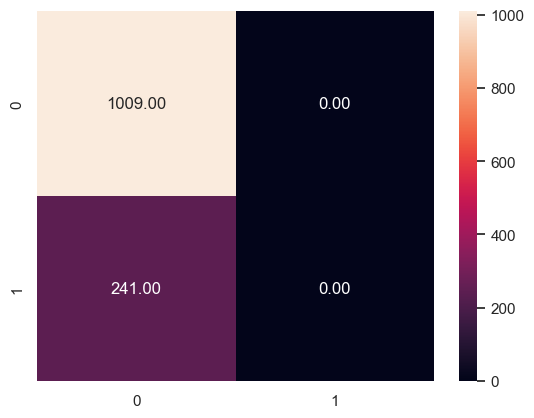

In [87]:
# true negative 0-0
# actuals are y-test
# heatmap

import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = '.2f')

In [88]:
# separate into train and test fror non-target variables
# and target variables
# 80 % train 20% test

X = df1.drop(["default_status"], axis=1)
y = df1["default_status"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       820
           1       0.00      0.00      0.00       180

    accuracy                           0.82      1000
   macro avg       0.41      0.50      0.45      1000
weighted avg       0.67      0.82      0.74      1000

[[820   0]
 [180   0]]
Logistic Regression accuracy is: 82.00%


In [90]:
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(solver='newton-cg', max_iter=5000)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       820
           1       0.00      0.00      0.00       180

    accuracy                           0.82      1000
   macro avg       0.41      0.50      0.45      1000
weighted avg       0.67      0.82      0.74      1000

[[820   0]
 [180   0]]
Logistic Regression accuracy is: 82.00%


In [91]:
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(solver='sag', max_iter=5000)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       820
           1       0.00      0.00      0.00       180

    accuracy                           0.82      1000
   macro avg       0.41      0.50      0.45      1000
weighted avg       0.67      0.82      0.74      1000

[[820   0]
 [180   0]]
Logistic Regression accuracy is: 82.00%


In [92]:
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(solver='saga', max_iter=5000)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       820
           1       0.00      0.00      0.00       180

    accuracy                           0.82      1000
   macro avg       0.41      0.50      0.45      1000
weighted avg       0.67      0.82      0.74      1000

[[820   0]
 [180   0]]
Logistic Regression accuracy is: 82.00%


In [93]:
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(solver='lbfgs', max_iter=5000)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       820
           1       0.00      0.00      0.00       180

    accuracy                           0.82      1000
   macro avg       0.41      0.50      0.45      1000
weighted avg       0.67      0.82      0.74      1000

[[820   0]
 [180   0]]
Logistic Regression accuracy is: 82.00%


# Support Vector Machines

In [94]:
from sklearn.svm import SVC
SVCclassifier = SVC(kernel='linear', max_iter=251)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy is: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.81      0.55      0.65       820
           1       0.17      0.42      0.24       180

    accuracy                           0.53      1000
   macro avg       0.49      0.48      0.45      1000
weighted avg       0.70      0.53      0.58      1000

[[449 371]
 [104  76]]
SVC accuracy is: 52.50%


In [95]:
from sklearn.svm import SVC
SVCclassifier = SVC(kernel='poly', max_iter=5000)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy is: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       820
           1       0.00      0.00      0.00       180

    accuracy                           0.82      1000
   macro avg       0.41      0.50      0.45      1000
weighted avg       0.67      0.82      0.74      1000

[[820   0]
 [180   0]]
SVC accuracy is: 82.00%


In [96]:
from sklearn.svm import SVC
SVCclassifier = SVC(kernel='poly')
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy is: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       820
           1       0.00      0.00      0.00       180

    accuracy                           0.82      1000
   macro avg       0.41      0.50      0.45      1000
weighted avg       0.67      0.82      0.74      1000

[[820   0]
 [180   0]]
SVC accuracy is: 82.00%


# K Neighbors

In [97]:
from sklearn.neighbors import KNeighborsClassifier
KNclassifier = KNeighborsClassifier(n_neighbors=30)
KNclassifier.fit(X_train, y_train)

y_pred = KNclassifier.predict(X_test.values)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
KNAcc = accuracy_score(y_pred,y_test)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       820
           1       0.00      0.00      0.00       180

    accuracy                           0.82      1000
   macro avg       0.41      0.50      0.45      1000
weighted avg       0.67      0.82      0.74      1000

[[820   0]
 [180   0]]
K Neighbours accuracy is: 82.00%


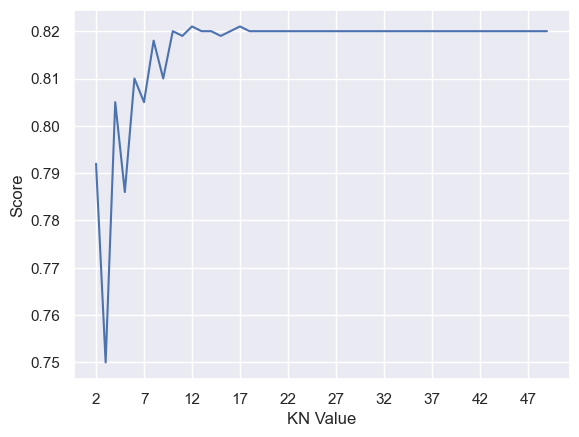

KNeighbours Acc Max 82.10%


In [98]:
scoreListKN = []
for i in range(2,50):
    KNclassifier = KNeighborsClassifier(n_neighbors=i)
    KNclassifier.fit(X_train, y_train)
    scoreListKN.append(KNclassifier.score(X_test.values, y_test))
    
plt.plot(range(2,50), scoreListKN)
plt.xticks(np.arange(2,50,5))
plt.xlabel("KN Value")
plt.ylabel("Score")
plt.show()
KNAccMax = max(scoreListKN)
print("KNeighbours Acc Max {:.2f}%".format(KNAccMax*100))

# Decision Tree

In [99]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=2)
DTclassifier.fit(X_train, y_train)

y_pred = DTclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
DTAcc = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       820
           1       0.00      0.00      0.00       180

    accuracy                           0.82      1000
   macro avg       0.41      0.50      0.45      1000
weighted avg       0.67      0.82      0.74      1000

[[820   0]
 [180   0]]
Decision Tree accuracy is: 82.00%


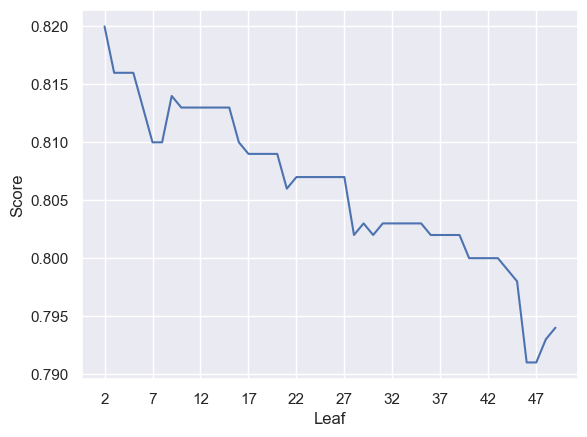

DT Acc Max 82.00%


In [100]:
scoreListDT = []
for i in range(2,50):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,50), scoreListDT)
plt.xticks(np.arange(2,50,5))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAccMax = max(scoreListDT)
print("DT Acc Max {:.2f}%".format(DTAccMax*100))

# Random Forest

In [101]:
from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier(max_leaf_nodes=30)
RFclassifier.fit(X_train, y_train)

y_pred = RFclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       820
           1       0.00      0.00      0.00       180

    accuracy                           0.82      1000
   macro avg       0.41      0.50      0.45      1000
weighted avg       0.67      0.82      0.74      1000

[[820   0]
 [180   0]]
Random Forest accuracy is: 82.00%


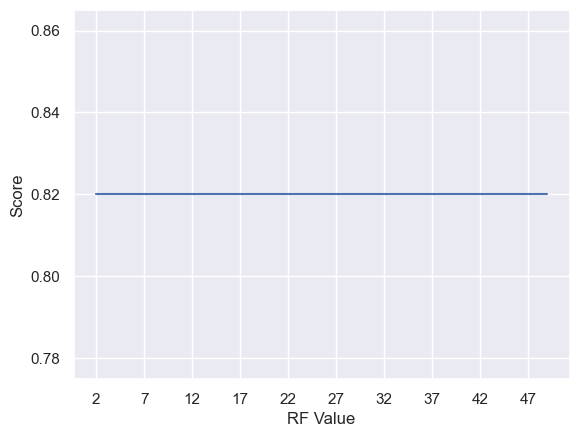

RF Acc Max 82.00%


In [102]:
# estimators is the number of tress it will create

scoreListRF = []
for i in range(2,50):
    RFclassifier = RandomForestClassifier(n_estimators = 200, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    
plt.plot(range(2,50), scoreListRF)
plt.xticks(np.arange(2,50,5))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAccMax = max(scoreListRF)
print("RF Acc Max {:.2f}%".format(RFAccMax*100))

# Categorical Naive Bayes

In [103]:
# Naive Bayes from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import CategoricalNB

NBclassifier1 = CategoricalNB()
NBclassifier1.fit(X_train, y_train)

y_pred = NBclassifier1.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc1 = accuracy_score(y_pred,y_test)
print('Naive Bayes accuracy is: {:.2f}%'.format(NBAcc1*100))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89       820
           1       0.07      0.01      0.01       180

    accuracy                           0.81      1000
   macro avg       0.44      0.49      0.45      1000
weighted avg       0.68      0.81      0.73      1000

[[807  13]
 [179   1]]
Naive Bayes accuracy is: 80.80%


# Gaussian Naive Bayes

In [104]:
# GaussianNB
from sklearn.naive_bayes import GaussianNB
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy is: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       820
           1       0.00      0.00      0.00       180

    accuracy                           0.82      1000
   macro avg       0.41      0.50      0.45      1000
weighted avg       0.67      0.82      0.74      1000

[[820   0]
 [180   0]]
Gaussian Naive Bayes accuracy is: 82.00%


In [105]:
# accuracy of all models into a dataframe

compare = pd.DataFrame({'Model': ['Logistic Regression', 'SVM', 'Decision Tree',  'Random Forest', 'GaussianNB', 'CategoricalNB'], 
                        'Accuracy': [LRAcc*100, SVCAcc*100, DTAcc*100, RFAcc*100, NBAcc2*100, NBAcc1*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,Logistic Regression,82.0
1,SVM,82.0
2,Decision Tree,82.0
3,Random Forest,82.0
4,GaussianNB,82.0
5,CategoricalNB,80.8


<Axes: >

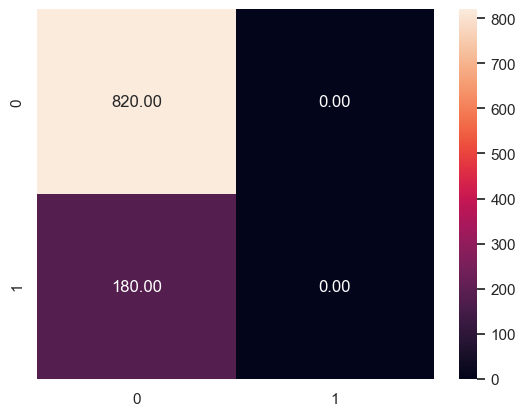

In [106]:
# true negative 0-0
# actuals are y-test
# heatmap

import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = '.2f')